<a href="https://colab.research.google.com/github/JoshAmpofo/mlzoomcamp_2025/blob/main/module4_evalution_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import libraries and download dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# download the data
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-20 07:33:22--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.01s   

2025-10-20 07:33:22 (5.55 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [3]:
# load csv file
lead_df = pd.read_csv('course_lead_scoring.csv')
print(lead_df.shape)
lead_df.head()

(1462, 9)


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [5]:
lead_df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


### **Data Preparation: Missing values**

In [6]:
# select categorical variables
categorical_cols = lead_df.dtypes[lead_df.dtypes == 'object'].index.to_list()
print(categorical_cols)

# select numerical cols
numerical_cols = lead_df.dtypes[lead_df.dtypes != 'object'].index.to_list()
print(numerical_cols)

['lead_source', 'industry', 'employment_status', 'location']
['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']


In [7]:
# check for missing values
lead_df[categorical_cols].isnull().sum()

,0
lead_source,128
industry,134
employment_status,100
location,63


In [8]:
# replace missing values in categorical cols with 'NA'
lead_df[categorical_cols] = lead_df[categorical_cols].fillna('NA')
lead_df[categorical_cols].isnull().sum()

,0
lead_source,0
industry,0
employment_status,0
location,0


In [9]:
lead_df[numerical_cols].isnull().sum()

,0
number_of_courses_viewed,0
annual_income,181
interaction_count,0
lead_score,0
converted,0


In [10]:
lead_df[numerical_cols] = lead_df[numerical_cols].fillna(0.0)
lead_df[numerical_cols].isnull().sum()

,0
number_of_courses_viewed,0
annual_income,0
interaction_count,0
lead_score,0
converted,0


### **Split the data**

In [16]:
from sklearn.model_selection import train_test_split

X = lead_df.drop('converted', axis=1)
y = lead_df['converted']

X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=1, stratify=y_full_train)

len(X_train), len(y_val), len(y_test), len(X_test), len(y_train)

(876, 293, 293, 293, 876)

In [17]:
X_full_train.shape

(1169, 8)

In [18]:
X_train.shape

(876, 8)

In [19]:
y_train.shape

(876,)

In [40]:
numerical_cols

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

### **Q1: ROC_AUC Feature Importance**

In [35]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc

In [48]:
from sklearn.metrics import roc_auc_score

# for each numerical variable in X_train, use it as a score and y as the ground truth and conpute the auc score
results = {}
for col_name in ['number_of_courses_viewed', 'annual_income',
                                'interaction_count', 'lead_score']:
  score = X_train[:, dv.get_feature_names_out().tolist().index(col_name)]
  auc = roc_auc_score(y_train, score) # (true, pred)

  if auc < 0.5:
    score = -score
    auc = roc_auc_score(y_train, score)

  results[col_name] = auc
  print(f"{col_name}: {auc}")

number_of_courses_viewed: 0.7519093679314673
annual_income: 0.5674735508989652
interaction_count: 0.7057305924709238
lead_score: 0.6177918249741454


###**Q2: Train the model**

In [24]:
X_train_dicts = X_train.to_dict(orient='records')
X_train_dicts

[{'lead_source': 'NA',
  'industry': 'technology',
  'number_of_courses_viewed': 2,
  'annual_income': 61066.0,
  'employment_status': 'employed',
  'location': 'asia',
  'interaction_count': 1,
  'lead_score': 0.36},
 {'lead_source': 'paid_ads',
  'industry': 'NA',
  'number_of_courses_viewed': 1,
  'annual_income': 72926.0,
  'employment_status': 'self_employed',
  'location': 'south_america',
  'interaction_count': 2,
  'lead_score': 0.71},
 {'lead_source': 'organic_search',
  'industry': 'technology',
  'number_of_courses_viewed': 3,
  'annual_income': 59656.0,
  'employment_status': 'unemployed',
  'location': 'middle_east',
  'interaction_count': 4,
  'lead_score': 0.65},
 {'lead_source': 'social_media',
  'industry': 'healthcare',
  'number_of_courses_viewed': 3,
  'annual_income': 46510.0,
  'employment_status': 'unemployed',
  'location': 'europe',
  'interaction_count': 3,
  'lead_score': 0.27},
 {'lead_source': 'referral',
  'industry': 'healthcare',
  'number_of_courses_vie

In [25]:
X_val_dicts = X_val.to_dict(orient='records')
X_val_dicts

[{'lead_source': 'referral',
  'industry': 'NA',
  'number_of_courses_viewed': 2,
  'annual_income': 62927.0,
  'employment_status': 'self_employed',
  'location': 'south_america',
  'interaction_count': 5,
  'lead_score': 0.47},
 {'lead_source': 'organic_search',
  'industry': 'manufacturing',
  'number_of_courses_viewed': 0,
  'annual_income': 0.0,
  'employment_status': 'employed',
  'location': 'north_america',
  'interaction_count': 2,
  'lead_score': 0.1},
 {'lead_source': 'organic_search',
  'industry': 'finance',
  'number_of_courses_viewed': 0,
  'annual_income': 51159.0,
  'employment_status': 'employed',
  'location': 'europe',
  'interaction_count': 1,
  'lead_score': 0.68},
 {'lead_source': 'referral',
  'industry': 'technology',
  'number_of_courses_viewed': 2,
  'annual_income': 62075.0,
  'employment_status': 'self_employed',
  'location': 'north_america',
  'interaction_count': 5,
  'lead_score': 0.36},
 {'lead_source': 'referral',
  'industry': 'education',
  'number_

In [26]:
# one-hot encode categorical variables
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(X_train_dicts)
X_val = dv.transform(X_val_dicts)

X_train.shape, X_val.shape

((876, 31), (293, 31))

In [27]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [49]:
lr_eval_model = LogisticRegression(solver='liblinear',
                        C=1.0, max_iter=1000)
lr_eval_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [50]:
y_pred_val = lr_eval_model.predict_proba(X_val)[:, 1]
# y_pred_val

In [55]:
auc_score = roc_auc_score(y_val, y_pred_val)
auc_score.round(4)

np.float64(0.9002)

###**Q3: Precision and Recall**

In [72]:
thresholds = np.arange(0.0, 1.0, 0.01)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [73]:
precisions = []
recs = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred_val >= t)
    predict_negative = (y_pred_val < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    precisions.append(precision)
    recs.append(recall)

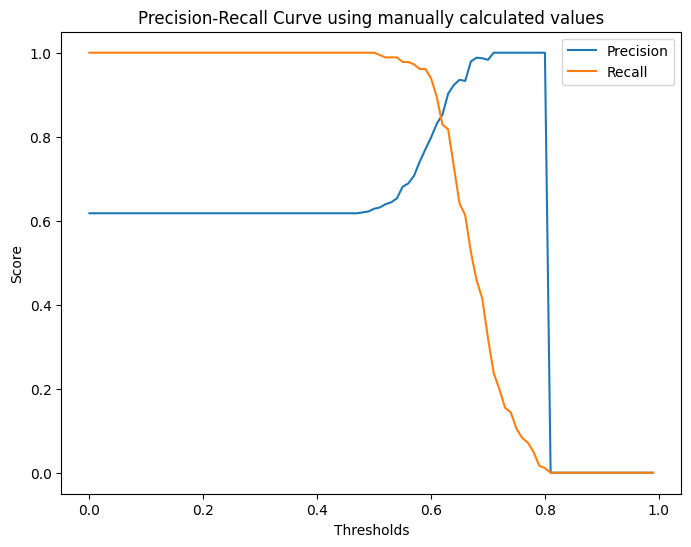

In [74]:
plt.figure(figsize=(8, 6))
# plt.plot(recs, precisions, marker='.')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recs, label='Recall')
plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.title('Precision-Recall Curve using manually calculated values')
plt.legend()
plt.show()

In [75]:
# using sklearn library to do the precision and recall calc
from sklearn.metrics import precision_score, recall_score
precision_scores = []
recall_scores = []

for t in thresholds:
  precision = precision_score(y_val, y_pred_val >= t, zero_division=0)
  recall = recall_score(y_val, y_pred_val >= t)

  precision_scores.append(precision)
  recall_scores.append(recall)

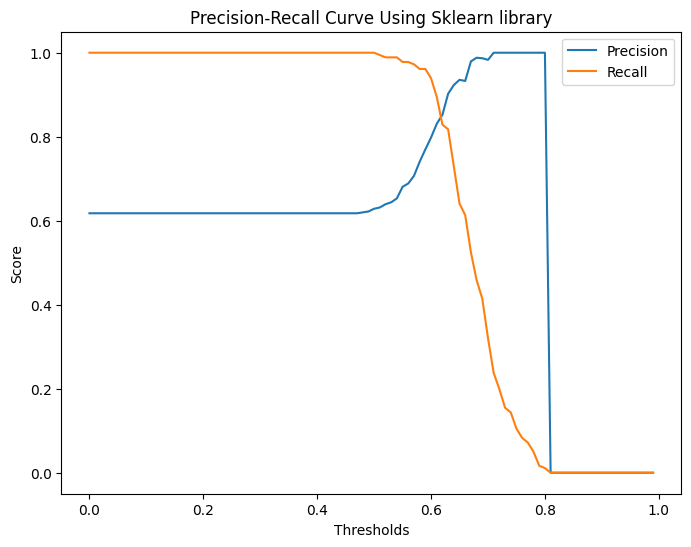

In [76]:
plt.figure(figsize=(8, 6))
# plt.plot(recs, precisions, marker='.')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.title('Precision-Recall Curve Using Sklearn library')
plt.legend()
plt.show()

###**Q4: F1 Score**

In [84]:
# calculate f1 score for each threshold
f1_scores = []

for precision, recall in zip(precision_scores, recall_scores):
  if (precision + recall) == 0:
    f1_score = 0.0
  else:
    f1_score = 2 * (precision * recall) / (precision + recall)
  f1_scores.append(f1_score)
  # print(f"Threshold: {t}, Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}")

In [83]:
# Find the index of the maximum F1 score
optimum_threshold_index = np.argmax(f1_scores)

# Get the optimum threshold and the maximum F1 score
optimum_threshold = thresholds[optimum_threshold_index]
optimum_f1_score = f1_scores[optimum_threshold_index]

print(f"The optimum threshold is: {optimum_threshold:.2f}")
print(f"The optimum F1 score is: {optimum_f1_score:.4f}")

The optimum threshold is: 0.60
The optimum F1 score is: 0.8629


###**Q5: 5-fold CV**

In [85]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state= 1)

In [97]:
scores = []
for train_idx, val_idx in kfold.split(X_full_train):
  # split the data
  train_cv = X_full_train.iloc[train_idx]
  val_cv = X_full_train.iloc[val_idx]

  y_train_cv = y_full_train.iloc[train_idx].values
  y_val_cv = y_full_train.iloc[val_idx].values

  # vectorize
  dv = DictVectorizer(sparse=False)
  X_train_cv = dv.fit_transform(train_cv.to_dict(orient='records'))
  X_val_cv = dv.transform(val_cv.to_dict(orient='records'))

  # train and predict
  model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
  model.fit(X_train_cv, y_train_cv)

  y_pred_val_cv = model.predict_proba(X_val_cv)[:, 1]

  # get auc score
  auc_score = roc_auc_score(y_val_cv, y_pred_val_cv)
  scores.append(auc_score)

# Results
print(f"AUC Scores: {[f'{s:.4f}' for s in scores]}")
# print(f"Mean AUC: {np.mean(scores):.3f}")
print(f"Standard Deviation: {np.std(scores):.3f}")

AUC Scores: ['0.8013', '0.8375', '0.8616', '0.7780', '0.8061']
Standard Deviation: 0.029


###**Q6: Hyperparameter Tuning**

In [99]:
C = [0.000001, 0.001, 1]

for c in C:
  kfold = KFold(n_splits=5, shuffle=True, random_state= 1)

  scores = []
  for train_idx, val_idx in kfold.split(X_full_train):
    # split the data
    train_cv = X_full_train.iloc[train_idx]
    val_cv = X_full_train.iloc[val_idx]

    y_train_cv = y_full_train.iloc[train_idx].values
    y_val_cv = y_full_train.iloc[val_idx].values

    # vectorize
    dv = DictVectorizer(sparse=False)
    X_train_cv = dv.fit_transform(train_cv.to_dict(orient='records'))
    X_val_cv = dv.transform(val_cv.to_dict(orient='records'))

    # train and predict
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    model.fit(X_train_cv, y_train_cv)

    y_pred_val_cv = model.predict_proba(X_val_cv)[:, 1]

    # get auc score
    auc_score = roc_auc_score(y_val_cv, y_pred_val_cv)
    scores.append(auc_score)

  # Results
  print(f"C: {c}")
  print(f"AUC Scores: {[f'{s:.4f}' for s in scores]}")
  print(f"Mean AUC: {np.mean(scores):.3f}")
  print(f"Standard Deviation: {np.std(scores):.3f}")

C: 1e-06
AUC Scores: ['0.5926', '0.5319', '0.5552', '0.6086', '0.5160']
Mean AUC: 0.561
Standard Deviation: 0.035
C: 0.001
AUC Scores: ['0.8404', '0.8830', '0.8968', '0.8507', '0.8294']
Mean AUC: 0.860
Standard Deviation: 0.026
C: 1
AUC Scores: ['0.8013', '0.8375', '0.8616', '0.7780', '0.8061']
Mean AUC: 0.817
Standard Deviation: 0.029
